(200, 3) (200,)
MSE: 6.214833257163152


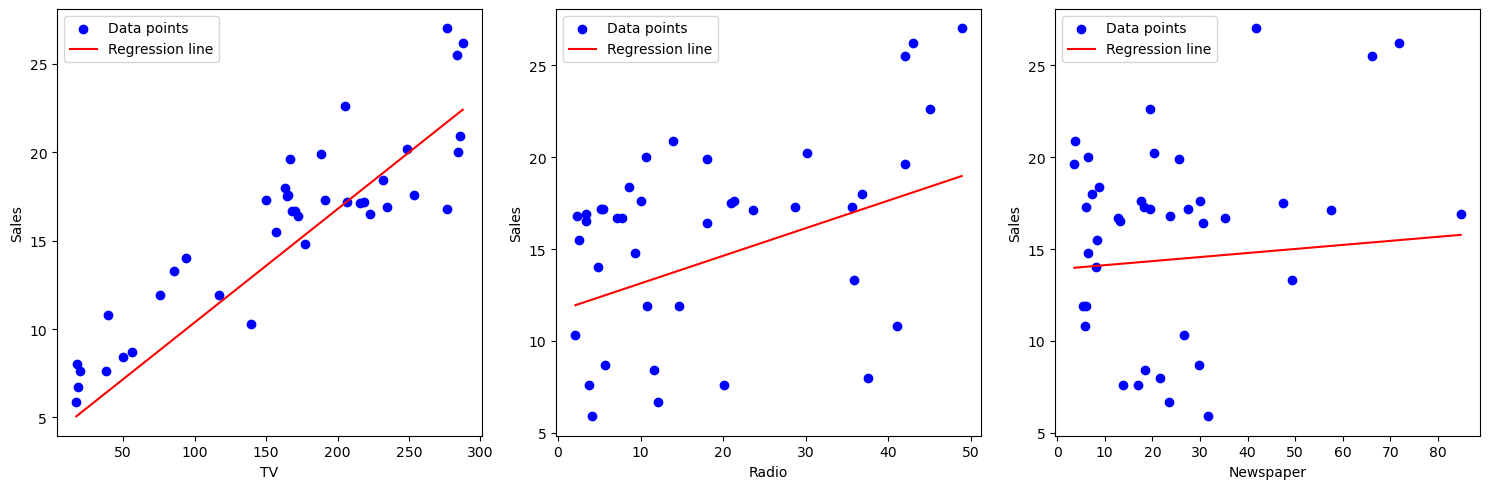

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression :
    def __init__ ( self , learning_rate =0.01 , epochs =1000) :
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(m):
                x_i = X.iloc[i].values
                y_i = y.iloc[i]

                y_pred = np.dot(x_i, self.w) + self.b
                dw = (1/m)*(y_pred - y_i) * x_i
                db = (1/m)*(y_pred - y_i)

                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred

    def evaluate(self, X, y):
        y_pred = self.predict(X)    
        mse = np.mean((y_pred - y)**2)
        return mse

    def plot_regression_line(self, X, y):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, feature in enumerate(X.columns):
            # Vẽ scatter plot các điểm dữ liệu
            axes[i].scatter(X[feature], y, color="blue", label="Data points")
            
            X_plot = X.copy()
            for other_feature in X.columns:
                if other_feature != feature:
                    X_plot[other_feature] = X[other_feature].mean()
            
            sort_idx = np.argsort(X[feature])
            x_sorted = X[feature].iloc[sort_idx]
            X_plot = X_plot.iloc[sort_idx]
            
            y_pred = self.predict(X_plot)
            axes[i].plot(x_sorted, y_pred, color="red", label="Regression line")
            
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel("Sales")
            axes[i].legend()
        plt.tight_layout()

# Load data chia tỉ lệ: Train 80% và Test 20%
data = pd.read_csv('advertising.csv')

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

print(X.shape, y.shape)

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Huấn luyện mô hình
model = LinearRegression(learning_rate =0.001, epochs =1000)
model.fit(X_train, y_train)

# Dự đoán và vẽ đường hồi quy
print(f"MSE: {model.evaluate(X_test, y_test)}")
model.plot_regression_line(X_test, y_test)